In [1]:
import torch
import torchvision.models as models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils.utils import sample_class_images, load_cifar10
from features.extractor import extract_edges, extract_hog, extract_sift, extract_gabor, extract_resnet_feature_map, extract_resnet_feature_map_norm
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


/home/redix/Desktop/prml/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/redix/Desktop/prml/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/redix/Desktop/prml/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
def visualize_feature_extraction(dataset, feature_extractors):
    """Visualizes feature extraction results for different methods."""
    images, labels = sample_class_images(dataset)  # Get one image per class

    fig, axes = plt.subplots(10, len(feature_extractors), figsize=(12, 20))

    for i, img in enumerate(images):
        for j, (name, extractor) in enumerate(feature_extractors.items()):
            extracted_img = extractor(img)
            cmap = "gray" if extracted_img.ndim == 2 else None  # Use grayscale if 2D
            axes[i, j].imshow(extracted_img, cmap=cmap)

            # Set column titles
            if i == 0:
                axes[i, j].set_title(name, fontsize=12)

        # Set row labels
        axes[i, 0].set_ylabel(class_names[labels[i]], fontsize=12)

    # Remove Axis Ticks
    for ax in axes.ravel():
        ax.set_xticks([])
        ax.set_yticks([])

    plt.tight_layout()
    plt.show()


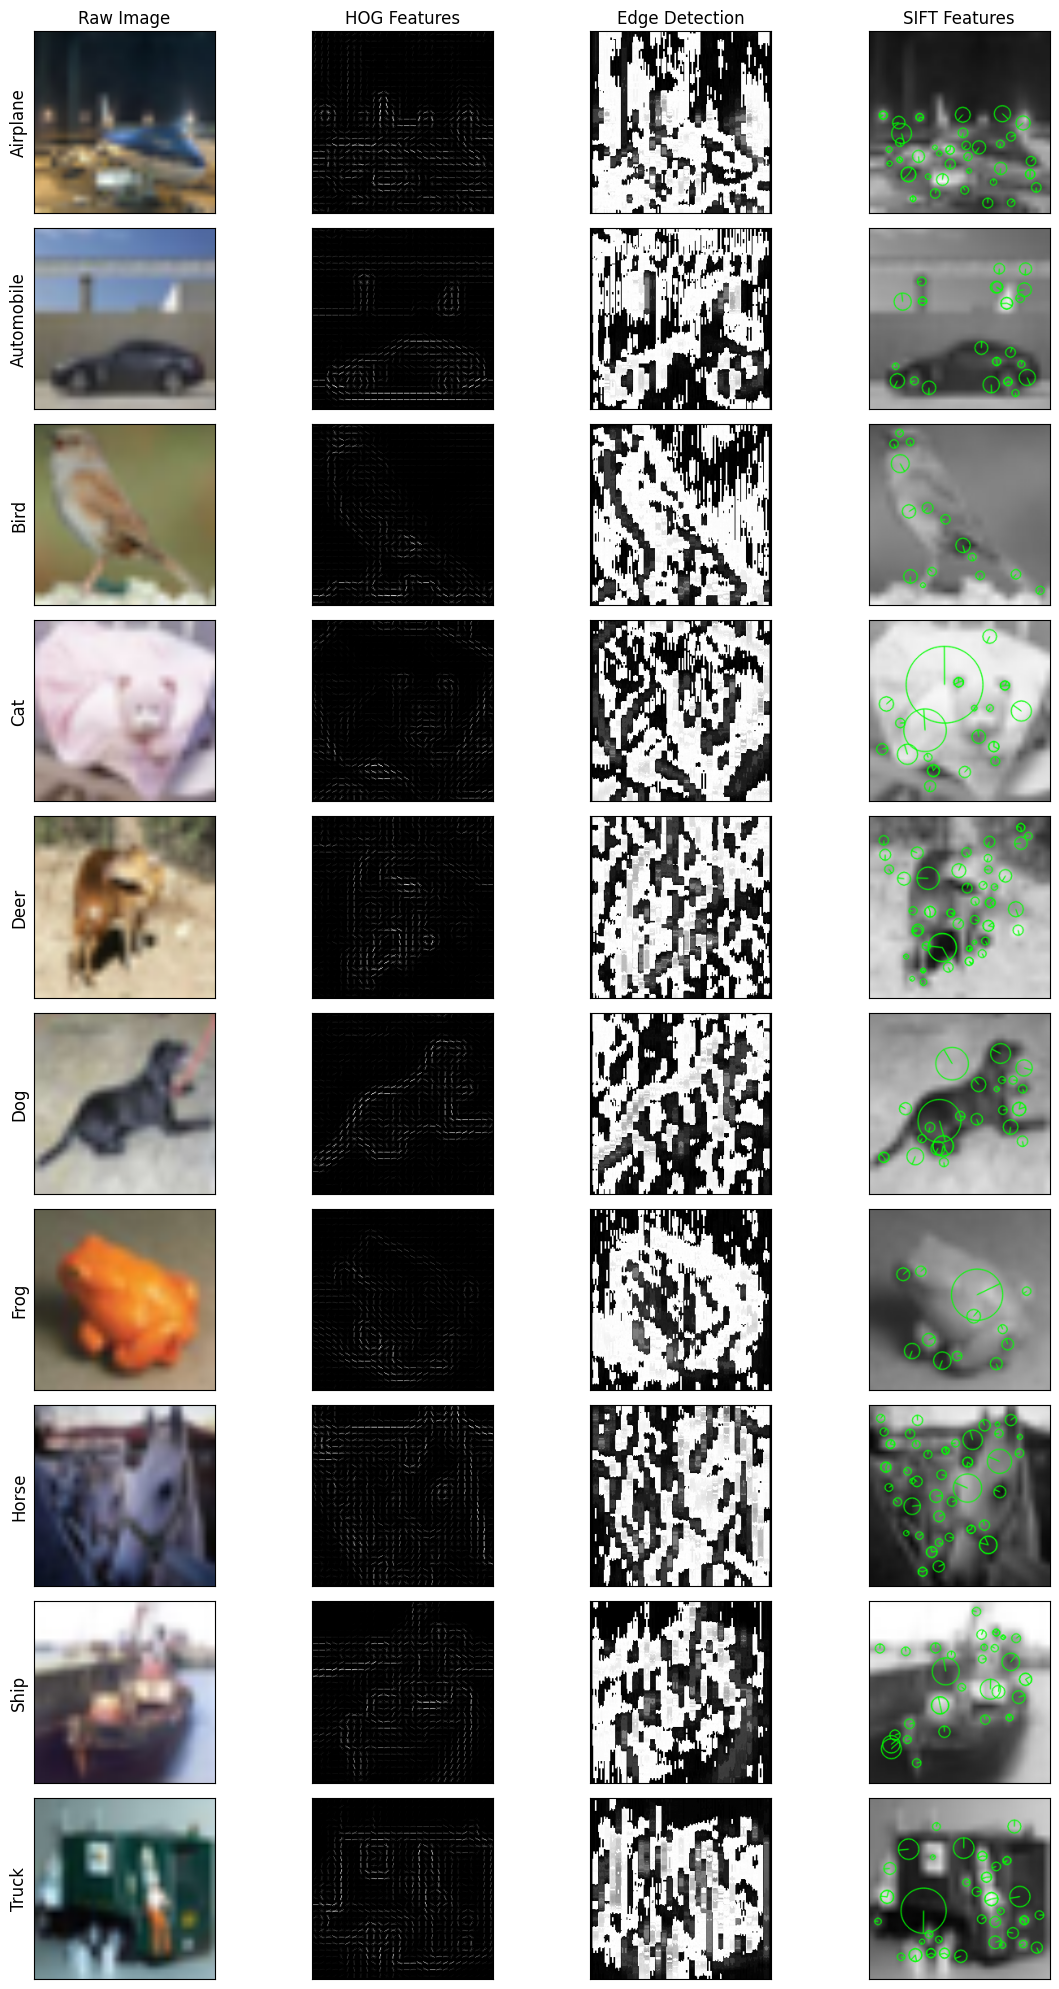

In [4]:
dataset = load_cifar10(transform=False)
if isinstance(dataset, torch.utils.data.DataLoader):
    dataset = dataset.dataset 

feature_extractors = {
        "Raw Image": lambda img: img,
        "HOG Features": extract_hog,
        "Edge Detection": extract_edges,
        "SIFT Features": extract_sift,
        # "Gabor Features": extract_resnet_feature_map_norm,
        # "ResNet18 Features": extract_resnet_feature_map 
        # "CNN Features": lambda img: get_cnn_features(img, model)
    }

visualize_feature_extraction(dataset, feature_extractors)
